<img src="https://cekumagroup.cas.lehigh.edu/sites/cekumagroup.cas2.lehigh.edu/files/image10.jpg "/>


## DESCRIPTION
- Health insurance has become an indispensable part of our lives in recent years, and people are paying for it so that they are covered in the event of an accident or other unpredicted factors.
- You are provided with medical costs dataset that has features such as Age, Cost, BMI.

### Objective:
    • Determine the factors that contribute the most in the calculation of insurance costs.
    • Predict the health Insurance Cost.

### Actions to Perform:
    1. Find the correlation of every pair of features (and the outcome variable).
    2. Visualize the correlations using a heatmap.
    3. Normalize your inputs.
    4. Use the test data to find out the accuracy of the model.
    5. Visualize how your model uses the different features and which features have a greater effect.


### Domain: Health Insurance Cost


#### Let us classify the variables as:
**Independent variables**

1. age : age of policyholder
2. sex: gender of policy holder (female=0, male=1)
3. bmi: Body mass index, ideally 18.5 to 25
4. children: number of children / dependents of policyholder
5. smoker: smoking state of policyholder (non-smoke=0;smoker=1) 
6. region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
7. charges: individual medical costs billed by health insurance

**Target variable**

1. insuranceclaim - categorical variable (0,1)

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
insuranceDF = pd.read_csv('insurance.csv')
print(insuranceDF.head(20))

    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.71780
14   27    male  42.130  

In [3]:
# Replace string values with numbers
insuranceDF['sex'] = insuranceDF['sex'].apply({'male':1, 'female':0}.get)
insuranceDF['smoker'] = insuranceDF['smoker'].apply({'yes':1, 'no':0}.get)
insuranceDF['region'] = insuranceDF['region'].apply({'southwest':1, 'northwest':2,
                                                    'southeast':3, 'northeast':4}.get)

In [4]:
# Check to make sure it is converted properly
insuranceDF.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### Carryout Data Exploration Analysis

In [5]:
correlation = insuranceDF.corr()
correlation.style.background_gradient()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.006660,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.006640,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.004036,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.035494,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.044124,0.787251
region,-0.006660,0.006640,0.004036,-0.035494,0.044124,1.000000,0.051509
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.051509,1.000000


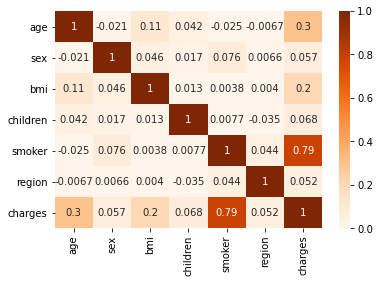

In [6]:
# Plot the heatmap
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(correlation, cmap="Oranges", annot = True, vmin=0, vmax=1, ax=ax);

In [7]:
insuranceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


The dataset consists the records of 1338 patients in total. Using 1000 records for training and 300 records for testing, and the last 38 records to cross check your model.

Before using machine learning,normalize your inputs. Machine Learning models often benefit substantially from input normalization. It also makes it easier to understand the importance of each feature later, when looking at the model weights. Normalize the data such that each variable has 0 mean and standard deviation of 1.

In [8]:
df_names = insuranceDF.columns
scaler = StandardScaler() #Scaler object
#Fit the data 
insuranceDF_scaled = scaler.fit_transform(insuranceDF)
#Convert it to dataframe
insuranceDF_scaled = pd.DataFrame(insuranceDF_scaled,columns=df_names)
insuranceDF_scaled.head()

# Below approach gives exactly the same
#means = np.mean(insuranceDF, axis=0)
#stds = np.std(insuranceDF, axis=0)
 
#insuranceDF_scaled = (insuranceDF - means)/stds
#insuranceDF_scaled.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,-1.370259,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.440513,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.440513,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.464873,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.464873,-0.776802


In [9]:
X = insuranceDF_scaled[['age','sex','bmi','children','smoker','region']] # Or drop.insuranceDF_scaled['charges']
y = insuranceDF_scaled['charges']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

### Cross validation, fitting of dataset into some boosting and normal algorithms

In [11]:
# Importing the models
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split
from xgboost import XGBClassifier
from sklearn import svm

# Splitting dataset into train, test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

# Using Shuffle Split for cross validation of dataset
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 10 )

# Initializing Algorithms
algorithm_list = {'LinearReg': LinearRegression(), "SVM":svm.SVR(),'Linearmodel':linear_model.LinearRegression(),
                  "SGDRegressor":linear_model.SGDRegressor(),'BayesianRidge':linear_model.BayesianRidge(),
                  "LassoLars": linear_model.LassoLars(),"ARDRegression": linear_model.ARDRegression(),
                  "PassiveAgg.Regressor": linear_model.PassiveAggressiveRegressor(),
                  "TheilSenRegressor": linear_model.TheilSenRegressor(),}

# Cross validation and fitting algorithms
for key,model in algorithm_list.items():
    try:
        cv_results = cross_validate(model, X_train, y_train, cv  = cv_split)
        model.fit(X_train, y_train)
        print(f"Classifier - {key: <20}            ||   test_score_mean - {cv_results.get('test_score').mean()}")
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

Classifier - LinearReg                       ||   test_score_mean - 0.7637881872327192
Classifier - SVM                             ||   test_score_mean - 0.8420296520959587
Classifier - Linearmodel                     ||   test_score_mean - 0.7637881872327192
Classifier - SGDRegressor                    ||   test_score_mean - 0.7634849290022804
Classifier - BayesianRidge                   ||   test_score_mean - 0.7637870235157833
Classifier - LassoLars                       ||   test_score_mean - -0.00542735848571696
Classifier - ARDRegression                   ||   test_score_mean - 0.7645829986697052
Classifier - PassiveAgg.Regressor            ||   test_score_mean - 0.5112059926001069
Classifier - TheilSenRegressor               ||   test_score_mean - 0.6922072984978673


### Make some predictions and calculate the accuracy score

In [12]:
# Making the predictions and calculating the accuracy score (R^2) for the various models
for key,model in algorithm_list.items():
    try:
        predictions = model.predict(X_test)
        score = model.score(X_test,y_test)
        print(f"Classifier - {key: <20} || Score/R^2 - {score *100}",'%')
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

Classifier - LinearReg            || Score/R^2 - 70.10520419010358 %
Classifier - SVM                  || Score/R^2 - 83.47448136860297 %
Classifier - Linearmodel          || Score/R^2 - 70.10520419010358 %
Classifier - SGDRegressor         || Score/R^2 - 70.01160237663247 %
Classifier - BayesianRidge        || Score/R^2 - 70.12959235080719 %
Classifier - LassoLars            || Score/R^2 - -0.4331243699906784 %
Classifier - ARDRegression        || Score/R^2 - 70.01689104152634 %
Classifier - PassiveAgg.Regressor || Score/R^2 - 56.58594739824201 %
Classifier - TheilSenRegressor    || Score/R^2 - 66.77467038561342 %


## Ascertain the feature with the greatest impact

In [13]:
#insuranceDF = pd.read_csv('insurance.csv')
#print(insuranceDF.head())

In [14]:
# Replace string values with numbers
#insuranceDF['sex'] = insuranceDF['sex'].apply({'male':1, 'female':0}.get)
#insuranceDF['smoker'] = insuranceDF['smoker'].apply({'yes':1, 'no':0}.get)
#insuranceDF['region'] = insuranceDF['region'].apply({'southwest':1, 'northwest':2,
#                                                    'southeast':3, 'northeast':4}.get)
#print(insuranceDF.head())

In [15]:
#insuranceDF.info()

In [16]:
dfTrain = insuranceDF[:1000]
dfTest = insuranceDF[1000:1300]
dfCheck = insuranceDF[1300:] 

In [17]:
# We use insuranceclaim as the target

In [18]:
trainLabel = np.asarray(dfTrain['sex'])
trainData = np.asarray(dfTrain.drop('sex',1))
testLabel = np.asarray(dfTest['sex'])
testData = np.asarray(dfTest.drop('sex',1))

In [19]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
 
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [20]:
insuranceCheck = LogisticRegression()
insuranceCheck.fit(trainData, trainLabel)

LogisticRegression()

In [21]:
accuracy = insuranceCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  50.0 %


To get a better sense of what is going on inside the logistic regression model, visualize how your model uses the different features and which features have greater effect.

Text(0.5, 0, 'Importance')

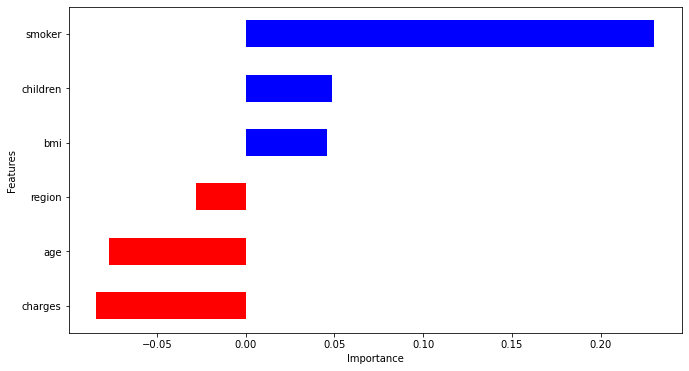

In [22]:
coeff = list(insuranceCheck.coef_[0])
labels = list(dfTrain.drop('sex',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From the above figure, 

1. Smoker had the most significant influence on the model. 

2. Age and Charges have a negative influence on the prediction


In [23]:
# To better explore the features dependent, we add the insuranceclaim column. Let's grab it from the second file
insuranceDF2 = pd.read_csv('insurance2.csv')
print(insuranceDF2.head())

   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


In [24]:
claimonly = insuranceDF2['insuranceclaim']
data = pd.concat([insuranceDF,insuranceDF2['insuranceclaim']], axis = 1)
data#data1.isnull().sum()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,1,16884.92400,1
1,18,1,33.770,1,0,3,1725.55230,1
2,28,1,33.000,3,0,3,4449.46200,0
3,33,1,22.705,0,0,2,21984.47061,0
4,32,1,28.880,0,0,2,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830,0
1334,18,0,31.920,0,0,4,2205.98080,1
1335,18,0,36.850,0,0,3,1629.83350,1
1336,21,0,25.800,0,0,1,2007.94500,0


In [25]:
#insuranceDF3 = insuranceDF.merge(claimonly)
#insuranceDF3 = pd.concat([insuranceDF,claimonly])

In [26]:
insuranceDF =data
insuranceDF.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [27]:
dfTrain = insuranceDF[:1000]
dfTest = insuranceDF[1000:1300]
dfCheck = insuranceDF[1300:] 

In [28]:
trainLabel = (dfTrain['insuranceclaim'])
trainData = (dfTrain.drop('insuranceclaim',1))
testLabel = (dfTest['insuranceclaim'])
testData = (dfTest.drop('insuranceclaim',1))

In [29]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [30]:
insuranceCheck = LogisticRegression()
insuranceCheck.fit(trainData, trainLabel)

LogisticRegression()

In [31]:
accuracy = insuranceCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  85.66666666666667 %


Text(0.5, 0, 'Importance')

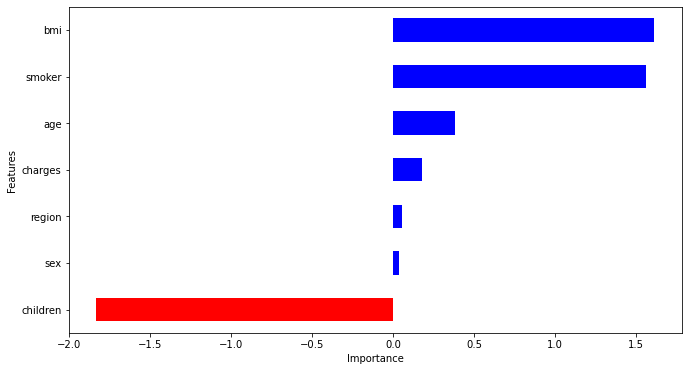

In [32]:
coeff = list(insuranceCheck.coef_[0])
labels = list(dfTrain.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From the above figure, 

1. BMI, Smoker have significant influence on the model, specially BMI. 

2. Children have a negative influence on the prediction, i.e. higher number children / dependents are correlated with a policy holder who has not taken insurance claim.

3. Although age was more correlated than BMI to the output variables, the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.

Note that this above interpretations require that your input data is normalized. Without that, you can't claim that importance is proportional to weights.

In [33]:
#insuranceDF
df_names = insuranceDF.columns
scaler = StandardScaler() #Scaler object
#Fit the data 
insuranceDF_scaled = scaler.fit_transform(insuranceDF)
#Convert it to dataframe
insuranceDF_scaled = pd.DataFrame(insuranceDF_scaled,columns=df_names)
insuranceDF_scaled.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,-1.370259,0.298584,0.841910
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.440513,-0.953689,0.841910
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.440513,-0.728675,-1.187776
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.464873,0.719843,-1.187776
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.464873,-0.776802,0.841910


In [34]:
feature_cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
X = insuranceDF[feature_cols] # Features
y = insuranceDF.insuranceclaim # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

### Model Development and Prediction
* First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.

* Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [35]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)


### Model Evaluation using Confusion Matrix
* A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [36]:
# import the metrics class
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[127,  34],
       [ 32, 209]])

### Inference
* You can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

### Visualizing Confusion Matrix using Heatmap
* Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Text(0.5, 257.44, 'Predicted label')

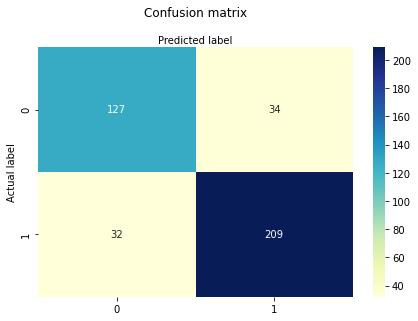

In [37]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Confusion Matrix Evaluation Metrics
* Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.835820895522388
Precision: 0.8600823045267489
Recall: 0.8672199170124482


### Inferences
* Accuracy - We got a classification rate of 83%, which can be considered as good accuracy.
* Precision: This is a measure of how accurate the model is. In other words, you can say, when a model makes a prediction, how often it is correct. In our current problem, it is 87% of the time.

* Recall: If there are patients with insurance claim in the test set the designed Logistic Regression model can identify it 87% of the time.

### ROC Curve
* Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

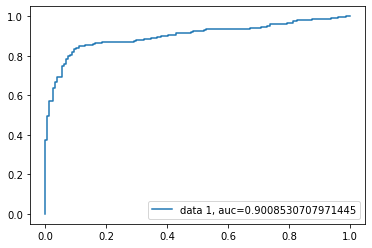

In [39]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Inferences
* The AUC score for the case is 0.90. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

#### Advantages
* Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

#### Disadvantages
* Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

Text(0.5, 0, 'Importance')

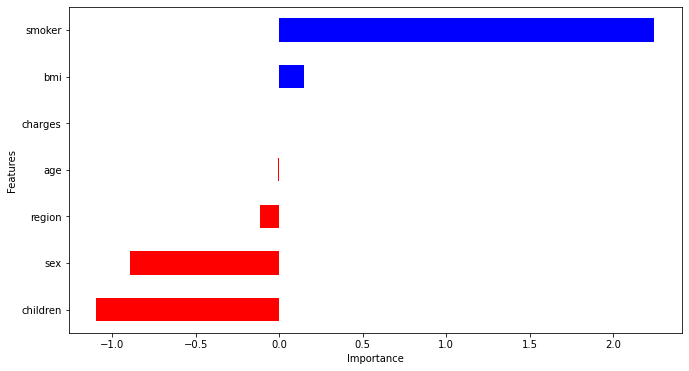

In [40]:
coeff = list(logreg.fit(X_train,y_train).coef_[0])
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From the above figure after the training 

1. BMI, Smoker have significant influence on the model, specially smoker. 

2. Children and sex have a negative influence on the prediction, i.e. higher number children / dependents or sex (male or female) are correlated with a policy holder who has not taken insurance claim.

3. Although age was more correlated than BMI to the output variables, the model relies more on smoker. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.

Note that this above interpretations require that your input data is normalized. Without that, you can't claim that importance is proportional to weights.

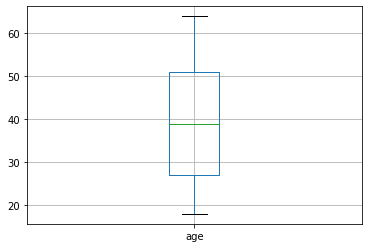

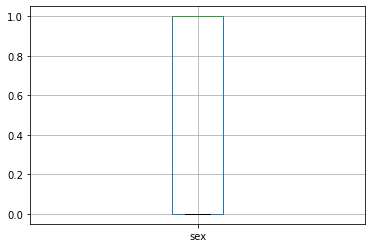

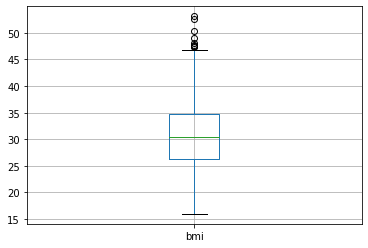

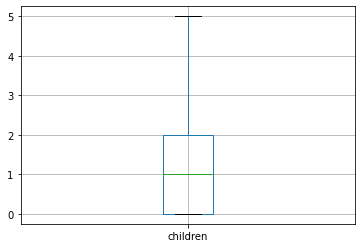

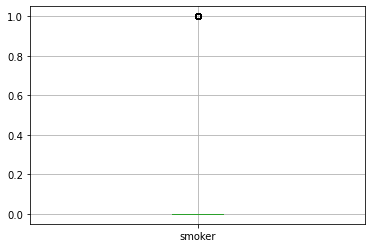

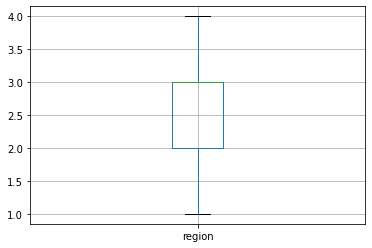

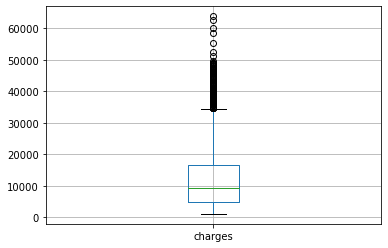

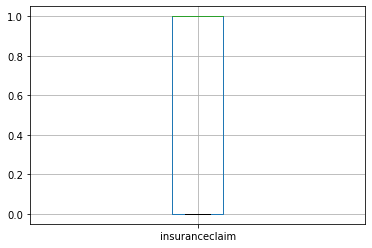

In [41]:
# Let's even check for outliers and remove it before our training
# Check for outliers and remove them from the analysis
for column in insuranceDF: #We can now visualize the outliers and hand them. This will be later
    plt.figure()
    insuranceDF.boxplot([column])

In [42]:
insuranceDF.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,1,16884.92400,1
1,18,1,33.770,1,0,3,1725.55230,1
2,28,1,33.000,3,0,3,4449.46200,0
3,33,1,22.705,0,0,2,21984.47061,0
4,32,1,28.880,0,0,2,3866.85520,1


In [43]:
# Remove the outliers
for x in ['bmi', 'charges']:
    q75,q25 = np.percentile(insuranceDF.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

# Replace the outliers with zeros to enable analysis later.
    insuranceDF.loc[insuranceDF[x] < min,x] = 0
    insuranceDF.loc[insuranceDF[x] > max,x] = 0

In [44]:
feature_cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
X = insuranceDF[feature_cols] # Features
y = insuranceDF.insuranceclaim # Target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [45]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)


In [46]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

array([[110,  51],
       [ 30, 211]])

Text(0.5, 257.44, 'Predicted label')

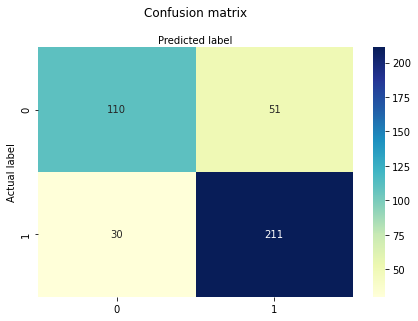

In [47]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7985074626865671
Precision: 0.8053435114503816
Recall: 0.8755186721991701


In [49]:
# Importing the models
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_validate, train_test_split
from xgboost import XGBClassifier
from sklearn import svm
# Using Shuffle Split for cross validation of dataset
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 10 )

# Initializing Algorithms
algorithm_list = {"Ada_boost": AdaBoostClassifier(),
                  "Gradient_boost":GradientBoostingClassifier(), 
                  "LogisticRegCV":LogisticRegressionCV(solver='liblinear'),
                  "RidgeClass": RidgeClassifierCV(),"SgdcClass": SGDClassifier(),
                  "LDA": LinearDiscriminantAnalysis(), "XgbClass": XGBClassifier(use_label_encoder=False,eval_metric="mlogloss"),
                  "QDA":QuadraticDiscriminantAnalysis(),'LogisticsReg':LogisticRegression()}

# Cross validation and fitting algorithms
for key,model in algorithm_list.items():
    try:
        cv_results = cross_validate(model, X_train, y_train, cv  = cv_split)
        model.fit(X_train, y_train)
        print(f"Classifier - {key: <20}            ||   test_score_mean - {cv_results.get('test_score').mean()}")
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

Classifier - Ada_boost                       ||   test_score_mean - 0.8722419928825623
Classifier - Gradient_boost                  ||   test_score_mean - 0.9654804270462634
Classifier - LogisticRegCV                   ||   test_score_mean - 0.8160142348754448
Classifier - RidgeClass                      ||   test_score_mean - 0.8597864768683274
Classifier - SgdcClass                       ||   test_score_mean - 0.5120996441281139
Classifier - LDA                             ||   test_score_mean - 0.8608540925266904
Classifier - XgbClass                        ||   test_score_mean - 0.982918149466192
Classifier - QDA                             ||   test_score_mean - 0.7978647686832739
Classifier - LogisticsReg                    ||   test_score_mean - 0.7526690391459075


## Making predictions and calculating accuracy score

In [50]:
for key,model in algorithm_list.items():
    try:
        predictions = model.predict(X_test)
        score       = metrics.accuracy_score(y_test,predictions)
        precision   = metrics.precision_score(y_test,predictions)
        recall      = metrics.recall_score(y_test, predictions)
        print(f"Class - {key: <20}, Score - {score}, Prec - {precision},Recall - {recall}")
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass


Class - Ada_boost           , Score - 0.845771144278607, Prec - 0.8713692946058091,Recall - 0.8713692946058091
Class - Gradient_boost      , Score - 0.9676616915422885, Prec - 0.9830508474576272,Recall - 0.9626556016597511
Class - LogisticRegCV       , Score - 0.8109452736318408, Prec - 0.8066914498141264,Recall - 0.9004149377593361
Class - RidgeClass          , Score - 0.8582089552238806, Prec - 0.8801652892561983,Recall - 0.8838174273858921
Class - SgdcClass           , Score - 0.5945273631840796, Prec - 0.5975,Recall - 0.991701244813278
Class - LDA                 , Score - 0.8606965174129353, Prec - 0.8838174273858921,Recall - 0.8838174273858921
Class - XgbClass            , Score - 0.9751243781094527, Prec - 0.979253112033195,Recall - 0.979253112033195
Class - QDA                 , Score - 0.7786069651741293, Prec - 0.8877551020408163,Recall - 0.7219917012448133
Class - LogisticsReg        , Score - 0.7985074626865671, Prec - 0.8053435114503816,Recall - 0.8755186721991701


In [51]:
# We can do hyperparameter tunning, but let's postpone that for later

In [52]:
for key,model in algorithm_list.items():
    try:
        predictions = model.predict(X_test)
        conf_matrix       = metrics.confusion_matrix(y_test, predictions)
        print(f"Class - {key: <20} \n {conf_matrix}")
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass
 

Class - Ada_boost            
 [[130  31]
 [ 31 210]]
Class - Gradient_boost       
 [[157   4]
 [  9 232]]
Class - LogisticRegCV        
 [[109  52]
 [ 24 217]]
Class - RidgeClass           
 [[132  29]
 [ 28 213]]
Class - SgdcClass            
 [[  0 161]
 [  2 239]]
Class - LDA                  
 [[133  28]
 [ 28 213]]
Class - XgbClass             
 [[156   5]
 [  5 236]]
Class - QDA                  
 [[139  22]
 [ 67 174]]
Class - LogisticsReg         
 [[110  51]
 [ 30 211]]


In [53]:
# Quick comment, sgdc_classifier not a good prediction model. This is inline with the small accuracy score

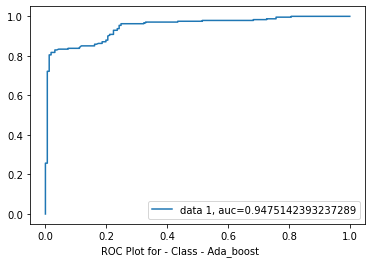

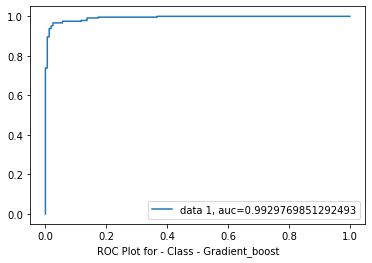

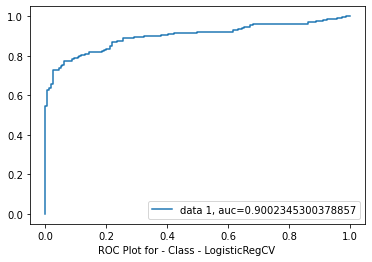

Exception occurred in 'RidgeClassifierCV' object has no attribute 'predict_proba'
Exception occurred in probability estimates are not available for loss='hinge'


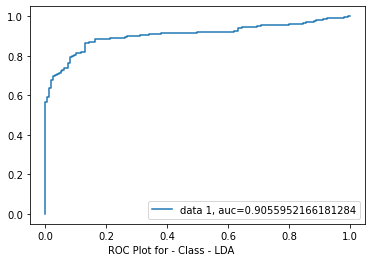

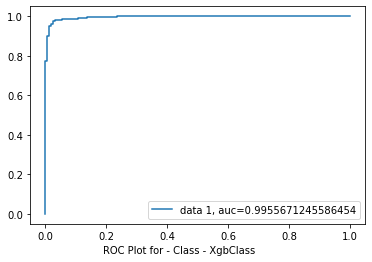

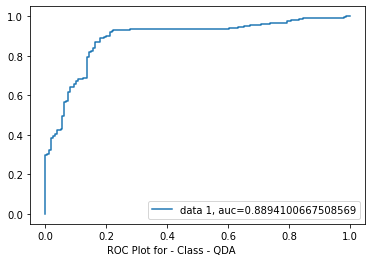

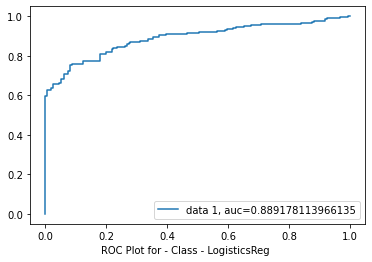

In [54]:

for key,model in algorithm_list.items():
    try:
        model.fit(X_train,y_train)
        y_pred_proba = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
        plt.figure()
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
        plt.legend(loc=4)
        plt.xlabel(f"ROC Plot for - Class - {key: <20}")
        plt.show()
#        print(f"Class - {key: <20} \n {coeff}")
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass
    

Exception occurred in 'AdaBoostClassifier' object has no attribute 'coef_'
Exception occurred in 'GradientBoostingClassifier' object has no attribute 'coef_'


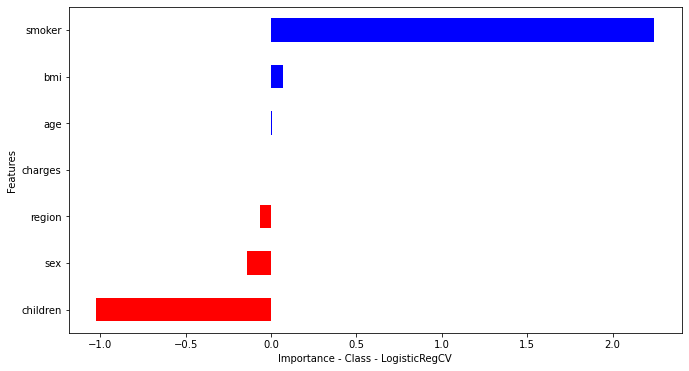

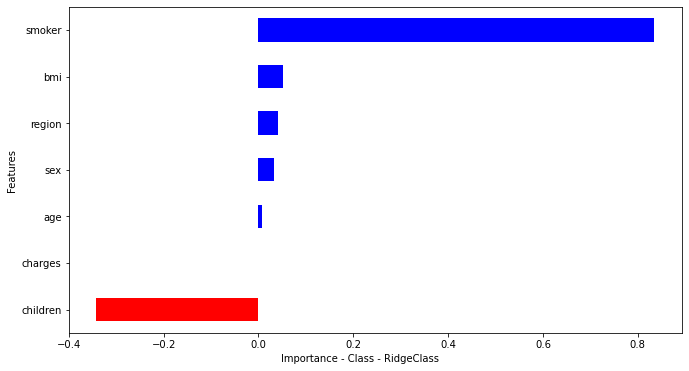

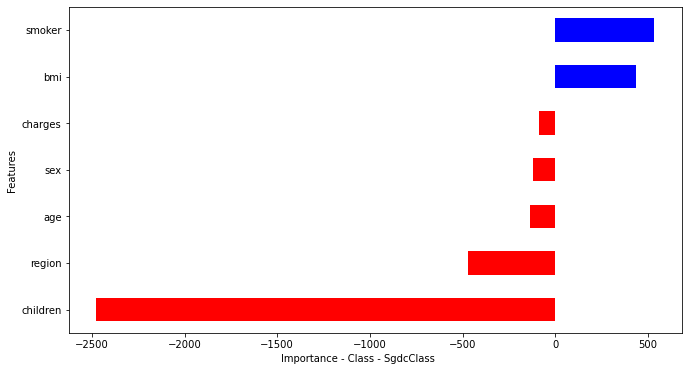

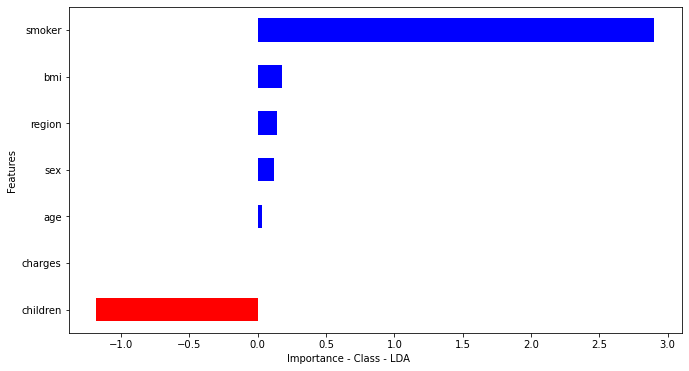

Exception occurred in Coefficients are not defined for Booster type None
Exception occurred in 'QuadraticDiscriminantAnalysis' object has no attribute 'coef_'


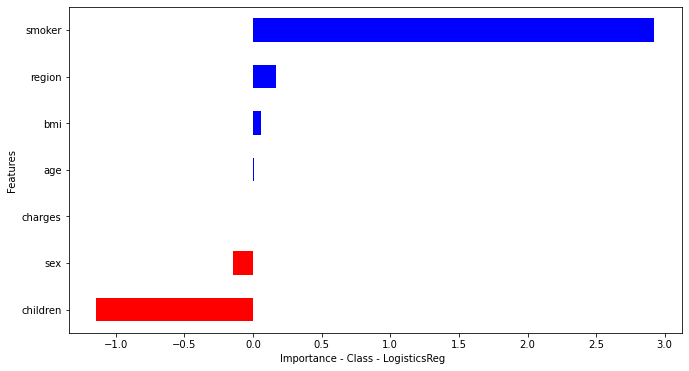

In [55]:
for key,model in algorithm_list.items():
    try:
        coeff = list(model.fit(X_train,y_train).coef_[0])
        labels = list(X_test.columns)
        plt.figure()
        features = pd.DataFrame()
        features['Features'] = labels
        features['importance'] = coeff
        features.sort_values(by=['importance'], ascending=True, inplace=True)
        features['positive'] = features['importance'] > 0
        features.set_index('Features', inplace=True)
        features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
        plt.xlabel(f"Importance - Class - {key: <20}")
        plt.show()
#        print(f"Class - {key: <20} \n {coeff}")
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

### Clearly, smoking is a major factor for those filling insurance claim as shown by all the model. The number of children such individual has, has strong negative correlation. So, a large family is not a key determinant in such a family filling medical or insurance claims

### Predict probability of claim for a new customer Ekuma

In [56]:
dataE = {'age':40,
        'sex':1,
        'bmi': 22.5,
         'children':4,
         'smoker': 0,
         'region': 3,
         'charges': 1645.52
        }
index = [1]
dataE_df = pd.DataFrame(dataE,index)
dataE_df

,age,sex,bmi,children,smoker,region,charges
1,40,1,22.5,4,0,3,1645.52


In [57]:
for key,model in algorithm_list.items():
    try:
        predictions = model.predict(dataE_df)
#        score       = metrics.accuracy_score(y_test,predictions)
#        precision   = metrics.precision_score(y_test,predictions)
#        recall      = metrics.recall_score(y_test, predictions)
        print(f"Class - {key: <20}, Insurance Claim - {predictions}")
    except Exception as e:
        print(f"Exception occurred in {str(e)}")
        pass

Class - Ada_boost           , Insurance Claim - [0]
Class - Gradient_boost      , Insurance Claim - [0]
Class - LogisticRegCV       , Insurance Claim - [0]
Class - RidgeClass          , Insurance Claim - [0]
Class - SgdcClass           , Insurance Claim - [0]
Class - LDA                 , Insurance Claim - [0]
Class - XgbClass            , Insurance Claim - [0]
Class - QDA                 , Insurance Claim - [0]
Class - LogisticsReg        , Insurance Claim - [0]


### Inferences from the prediction
* Note, 0 means the patient will not file insurance claim while 1 means the opposite. So, all the model predicted that this individual will not file insurance claim. We can say with high certainty that our prediction of not filling insurance claim is true. 

### We can use the medical charges as the target and we can predict the potential cost of medical insurance for a given individual 
* This will be straightforward as it is just removing it from one of the features and move claim in the opposite direction